# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [3]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [4]:
df.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

In [5]:
df.shape

(907, 27)

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df['country'].unique()

array(['IND'], dtype=object)

In [8]:
df['country_long'].unique()

array(['India'], dtype=object)

In [9]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

# Data Cleaning

In [10]:
#checking for all the null values in the columns
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Above observation shows that many features/columns are having null values in the dataset.

In [11]:
df.isnull().sum().sum()

10445

In [12]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Observations shows that some columns are integer and float type and rest are object type.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

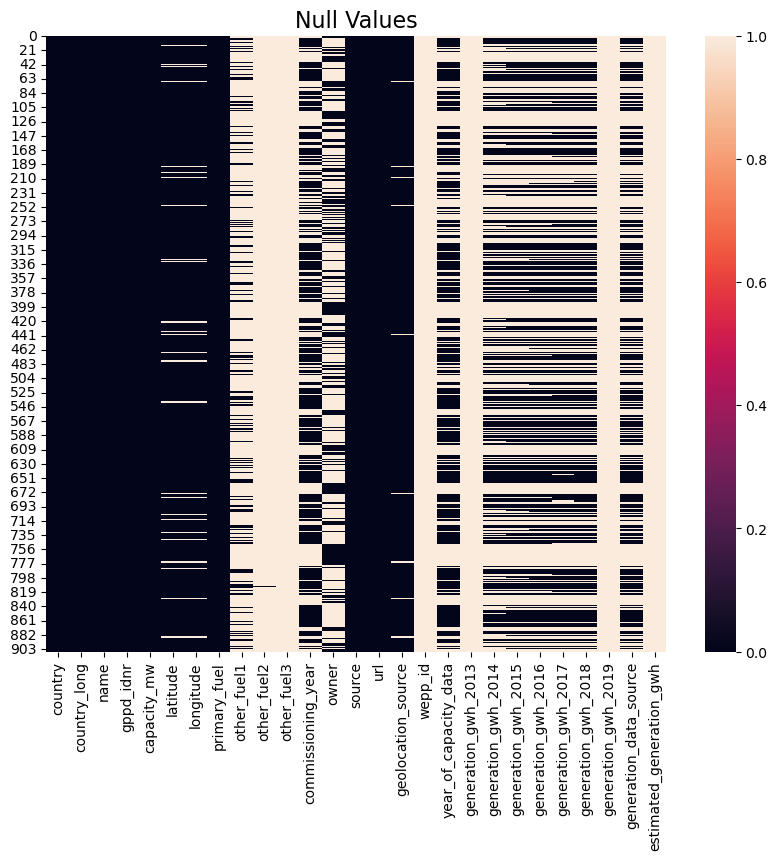

In [14]:
# ploting the heatmap to check null values
plt.figure(figsize=(10,8))
plt.title('Null Values',fontsize=16)
sns.heatmap(df.isnull());

This above heatmap displays that null values are present in this dataset.

In [15]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [16]:
df['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 2.93600000e+03,
       2.92521045e+03, 7.92686650e+02, 7.23528100e+03, 1.33253385e+03,
       9.46141000e+02, 1.07595320e+03, 8.56595500e+01, 1.20444750e+02,
       2.65780000e+02, 3.04832800e+02, 4.95967700e+02, 1.22100000e+03,
       5.05760000e+02, 1.25573200e+03, 2.85387000e+00, 1.24631710e+03,
       2.93534950e+02, 5.44576300e+03, 5.03370500e+01, 5.24180925e+03,
       6.50730000e+01, 1.36872200e+02, 6.75605000e+01, 2.96272000e+03,
       8.32884650e+02, 9.07937500e+01, 2.99176600e+02, 5.85507000e+03,
       2.23699080e+03, 1.43887000e+03, 8.11580000e+00, 1.45560000e+02,
       5.37195000e+03, 2.34650850e+02, 3.30595670e+03, 3.73919000e+02,
       1.49121645e+03, 2.53904100e+03, 1.01567610e+03, 4.48805700e+03,
      

In [17]:
df['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       2.01300000e+03, 2.98513930e+03, 5.53220000e+01, 7.41862050e+02,
       5.97912500e+03, 1.43795470e+03, 6.18909900e+02, 1.96760200e+02,
       9.48831000e+02, 5.71607600e+02, 1.06942600e+02, 3.96806000e+01,
       2.31610720e+03, 2.31626436e+02, 0.00000000e+00, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [18]:
df['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       1.51100000e+03, 2.17363720e+03, 1.75018510e+03, 6.65983350e+02,
       6.34120200e+03, 2.80000000e+03, 9.96373100e+02, 1.29033000e+03,
       1.66863100e+03, 1.23282490e+03, 1.09181350e+02, 5.32126000e+01,
       6.77378800e+03, 1.87193669e+02, 1.20903640e+02, 4.43242650e+02,
       7.17700000e+03, 3.54900000e+02, 1.27499900e+03, 1.04689800e+01,
       1.33603625e+03, 2.96271200e+02, 0.00000000e+00, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [19]:
df['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [20]:
df['generation_gwh_2018'].unique()

array([           nan, 6.26239128e+02, 7.27900000e+03, 9.76655000e+02,
       4.83271500e+01, 5.79318850e+02, 4.06377900e+02, 1.48788000e+03,
       3.71715400e+03, 4.25641100e+02, 7.87397300e+03, 1.86976559e+04,
       5.28280000e+02, 6.24180100e+03, 5.21000000e+02, 0.00000000e+00,
       1.26800000e+03, 2.27969425e+03, 1.84862045e+03, 3.64836650e+02,
       6.52664500e+03, 2.55300000e+03, 1.72354895e+03, 1.94495000e+03,
       1.16634200e+03, 5.75458250e+02, 3.69045500e+01, 8.48934000e+01,
       6.34482000e+03, 1.73720000e+02, 4.01506167e+01, 3.54409050e+02,
       9.33400000e+03, 1.33912800e+02, 1.17900700e+03, 5.60000000e-02,
       1.26920210e+03, 2.50302200e+02, 3.78775000e+03, 5.49339500e+01,
       4.21699905e+03, 5.61578000e+01, 4.67430000e+02, 7.67742000e+01,
       3.38897000e+01, 6.98490000e+01, 3.13930800e+03, 9.05241050e+02,
       9.40971500e+01, 3.14320500e+02, 6.14642200e+03, 2.29963000e+03,
       1.29485400e+03, 2.75010000e+03, 5.67610000e+02, 2.57406200e+03,
      

In [21]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [22]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [23]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [24]:
df['other_fuel3'].unique() # irrelevant column

array([nan])

In [25]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [26]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [27]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [28]:
df['wepp_id'].unique() # irrelevant column

array([nan])

In [29]:
df['generation_gwh_2013'].unique() # irrelevant column

array([nan])

In [30]:
df['generation_gwh_2019'].unique() # irrelevant column

array([nan])

In [31]:
df['estimated_generation_gwh'].unique() # irrelevant column

array([nan])

In [32]:
# Dropping irrelevant columns which are completely null in this dataset:-

df=df.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...                                source  \
0    ...  National Renewable Energy Laboratory   
1    ...                  Ultratech Cement ltd   
2    ...                                   CDM   
3    ...         Central Electricity Authority   
4    ...         Central Electricity Authority   
..   ...                                   ...   
902  ...         Central Electricity Authority   
903  ...   Karnataka Power Corporation Limited   
904  ...                                   CDM   
905  ...                    Hindustan Zinc ltd   
906  ...                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source year_of_capacity_data  \
0    National Renewable Energy Laboratory                   NaN   
1                                     WRI                   NaN   
2                                     WRI                   NaN   
3                                     WRI                2019.0   
4                                     WRI                2019.0   
..                                    ...                   ...   
902                                   WRI                2019.0   
903                        Industry About                   NaN   
904                                   WRI                   NaN   
905                                   WRI                   NaN   
906                                   WRI                   NaN   

    generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                   NaN                  NaN          

In [33]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               906
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [34]:
df.shape

(907, 22)

In [35]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [36]:
df_n = df.copy()
df_n['other_fuel1'].fillna(df_n['other_fuel1'].value_counts().idxmax(), inplace=True)
df_n['other_fuel2'].fillna(df_n['other_fuel2'].value_counts().idxmax(), inplace=True)
df_n['owner'].fillna(df_n['owner'].value_counts().idxmax(), inplace=True)
df_n['geolocation_source'].fillna(df_n['geolocation_source'].value_counts().idxmax(), inplace=True)
df_n['year_of_capacity_data'].fillna(df_n['year_of_capacity_data'].value_counts().idxmax(), inplace=True)
df_n['generation_data_source'].fillna(df_n['generation_data_source'].value_counts().idxmax(), inplace=True)
df_n["latitude"].fillna(df_n["latitude"].mean(skipna=True), inplace=True)
df_n["longitude"].fillna(df_n["longitude"].mean(skipna=True), inplace=True)
df_n["commissioning_year"].fillna(df_n["commissioning_year"].mean(skipna=True), inplace=True)
df_n["generation_gwh_2014"].fillna(df_n["generation_gwh_2014"].mean(skipna=True), inplace=True)
df_n["generation_gwh_2015"].fillna(df_n["generation_gwh_2015"].mean(skipna=True), inplace=True)
df_n["generation_gwh_2016"].fillna(df_n["generation_gwh_2016"].mean(skipna=True), inplace=True)
df_n["generation_gwh_2017"].fillna(df_n["generation_gwh_2017"].mean(skipna=True), inplace=True)
df_n["generation_gwh_2018"].fillna(df_n["generation_gwh_2018"].mean(skipna=True), inplace=True)

In [37]:
df_n

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         Oil         Oil   
1           98.0   24.7663    74.6090         Coal         Oil         Oil   
2           39.2   21.9038    69.3732         Wind         Oil         Oil   
3          135.0   23.8712    91.3602          Gas         Oil         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil         Oil   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         Oil   
903          3.0   12.8932    78.1654        Solar         Oil         Oil   
904         25.5   15.2758    75.5811         Wind         Oil         Oil   
905         80.0   24.3500    73.7477         Coal         Oil         Oil   
906         16.5    9.9344    77.4768         Wind         Oil         Oil   

     ...                                source  \
0    ...  National Renewable Energy Laboratory   
1    ...                  Ultratech Cement ltd   
2    ...                                   CDM   
3    ...         Central Electricity Authority   
4    ...         Central Electricity Authority   
..   ...                                   ...   
902  ...         Central Electricity Authority   
903  ...   Karnataka Power Corporation Limited   
904  ...                                   CDM   
905  ...                    Hindustan Zinc ltd   
906  ...                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source year_of_capacity_data  \
0    National Renewable Energy Laboratory                2019.0   
1                                     WRI                2019.0   
2                                     WRI                2019.0   
3                                     WRI                2019.0   
4                                     WRI                2019.0   
..                                    ...                   ...   
902                                   WRI                2019.0   
903                        Industry About                2019.0   
904                                   WRI                2019.0   
905                                   WRI                2019.0   
906                                   WRI                2019.0   

    generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           2431.823590          2428.226946          

In [38]:
df_n.shape

(907, 22)

In [39]:
df_n.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# Expolatory Data Analysis (EDA)

In [40]:
df_n.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.079148    4.812291           13.016360   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1997.091082   
50%      59.200000   21.281800   76.979200         1997.091082   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
count                  907.0           907.000000           907.000000   
mean                  2019.0          2431.823590          2428.226946   
std                      0.0          2665.338608          2859.349132   
min                   2019.0             0.000000             0.000000   
25%                   2019.0          1211.362750           916.000000   
50%                   2019.0          2431.823590          2428.226946   
75%                   2019.0          2431.823590          2428.226946   
max                   2019.0         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000           907.000000  
mean           2467.936859          2547.759305          2600.804099  
std            2877.890004          2921.502193          3030.808041  
min               0.000000             0.000000             0.000000  
25%             896.500214           882.594850           824.842340  
50%            2467.936859          2547.759305          2600.804099  
75%            2467.936859          2547.759305          2600.804099  
max           30015.000000         35116.000000         35136.000000

In [41]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   other_fuel2             907 non-null    object 
 10  commissioning_year      907 non-null    float64
 11  owner                   907 non-null    object 
 12  source                  907 non-null    object 
 13  url                     907 non-null    object 
 14  geolocation_source      907 non-null    ob

In [42]:
df_n.shape

(907, 22)

In [43]:
df_n.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
other_fuel2                 1
commissioning_year         74
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      1
dtype: int64

In [44]:
df_n.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
other_fuel2                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [45]:
df_n.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [46]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

val=['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1','other_fuel2','owner','source','url',
     'geolocation_source','generation_data_source']
for i in val:
    df_n[i]=le.fit_transform(df_n[i])

In [48]:
df_n

country  country_long  name  gppd_idnr  capacity_mw  latitude  longitude  \
0          0             0     0        657          2.5   28.1839    73.2407   
1          0             0     1        519         98.0   24.7663    74.6090   
2          0             0     2        853         39.2   21.9038    69.3732   
3          0             0     3          0        135.0   23.8712    91.3602   
4          0             0     4          1       1800.0   21.9603    82.4091   
..       ...           ...   ...        ...          ...       ...        ...   
902        0             0   902        491       1600.0   16.2949    77.3568   
903        0             0   903        822          3.0   12.8932    78.1654   
904        0             0   904        891         25.5   15.2758    75.5811   
905        0             0   905        539         80.0   24.3500    73.7477   
906        0             0   906        876         16.5    9.9344    77.4768   

     primary_fuel  other_fuel1  other_fuel2  ...  source  url  \
0               6            2            0  ...     109  128   
1               1            2            0  ...     174  173   
2               7            2            0  ...      21  205   
3               2            2            0  ...      22   58   
4               1            2            0  ...      22   58   
..            ...          ...          ...  ...     ...  ...   
902             1            2            0  ...      22   58   
903             6            2            0  ...      77   22   
904             7            2            0  ...      21  260   
905             1            2            0  ...      59   82   
906             7            2            0  ...      21  245   

     geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0                     1                 2019.0          2431.823590   
1                     2                 2019.0          2431.823590   
2                     2                 2019.0          2431.823590   
3                     2                 2019.0           617.789264   
4                     2                 2019.0          3035.550000   
..                  ...                    ...                  ...   
902                   2                 2019.0          2431.823590   
903                   0                 2019.0          2431.823590   
904                   2                 2019.0          2431.823590   
905                   2                 2019.0          2431.823590   
906                   2                 2019.0          2431.823590   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            2428.226946          2467.936859          2547.759305   
1            2428.226946          2467.936859          2547.759305   
2            2428.226946          2467.936859          2547.759305   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903          2428.226946          2467.936859          2547.759305   
904          2428.226946          2467.936859          2547.759305   
905          2428.226946          2467.936859          2547.759305   
906          2428.226946          2467.936859          2547.759305   

     generation_gwh_2018  generation_data_source  
0            2600.804099                       0  
1            2600.804099                       0  
2            2600.804099                       0  
3             626.239128                       0  
4            7279.000000                       0  
..                   ...                     ...  
902           686.500000                       0  
903          2600.804099                       0  
904          2600.804099                       0  
905          2600.804099                       

In [49]:
df_n.dtypes

country                     int32
country_long                int32
name                        int32
gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
other_fuel2                 int32
commissioning_year        float64
owner                       int32
source                      int32
url                         int32
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source      int32
dtype: object

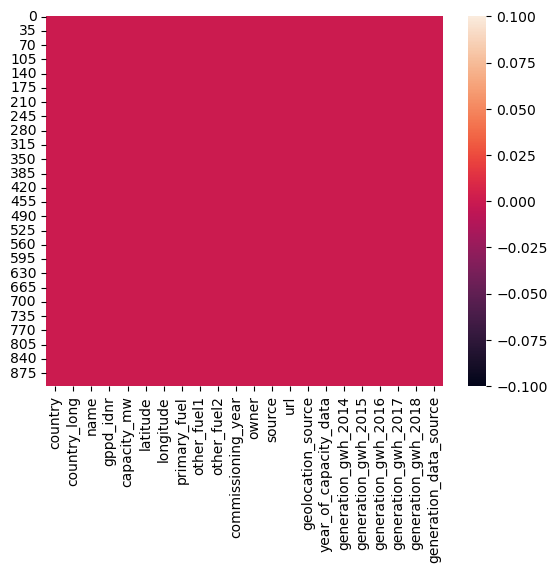

In [50]:
sns.heatmap(df_n.isnull())
plt.show()

Above heatmap shows that no null values are there in our dataset now.

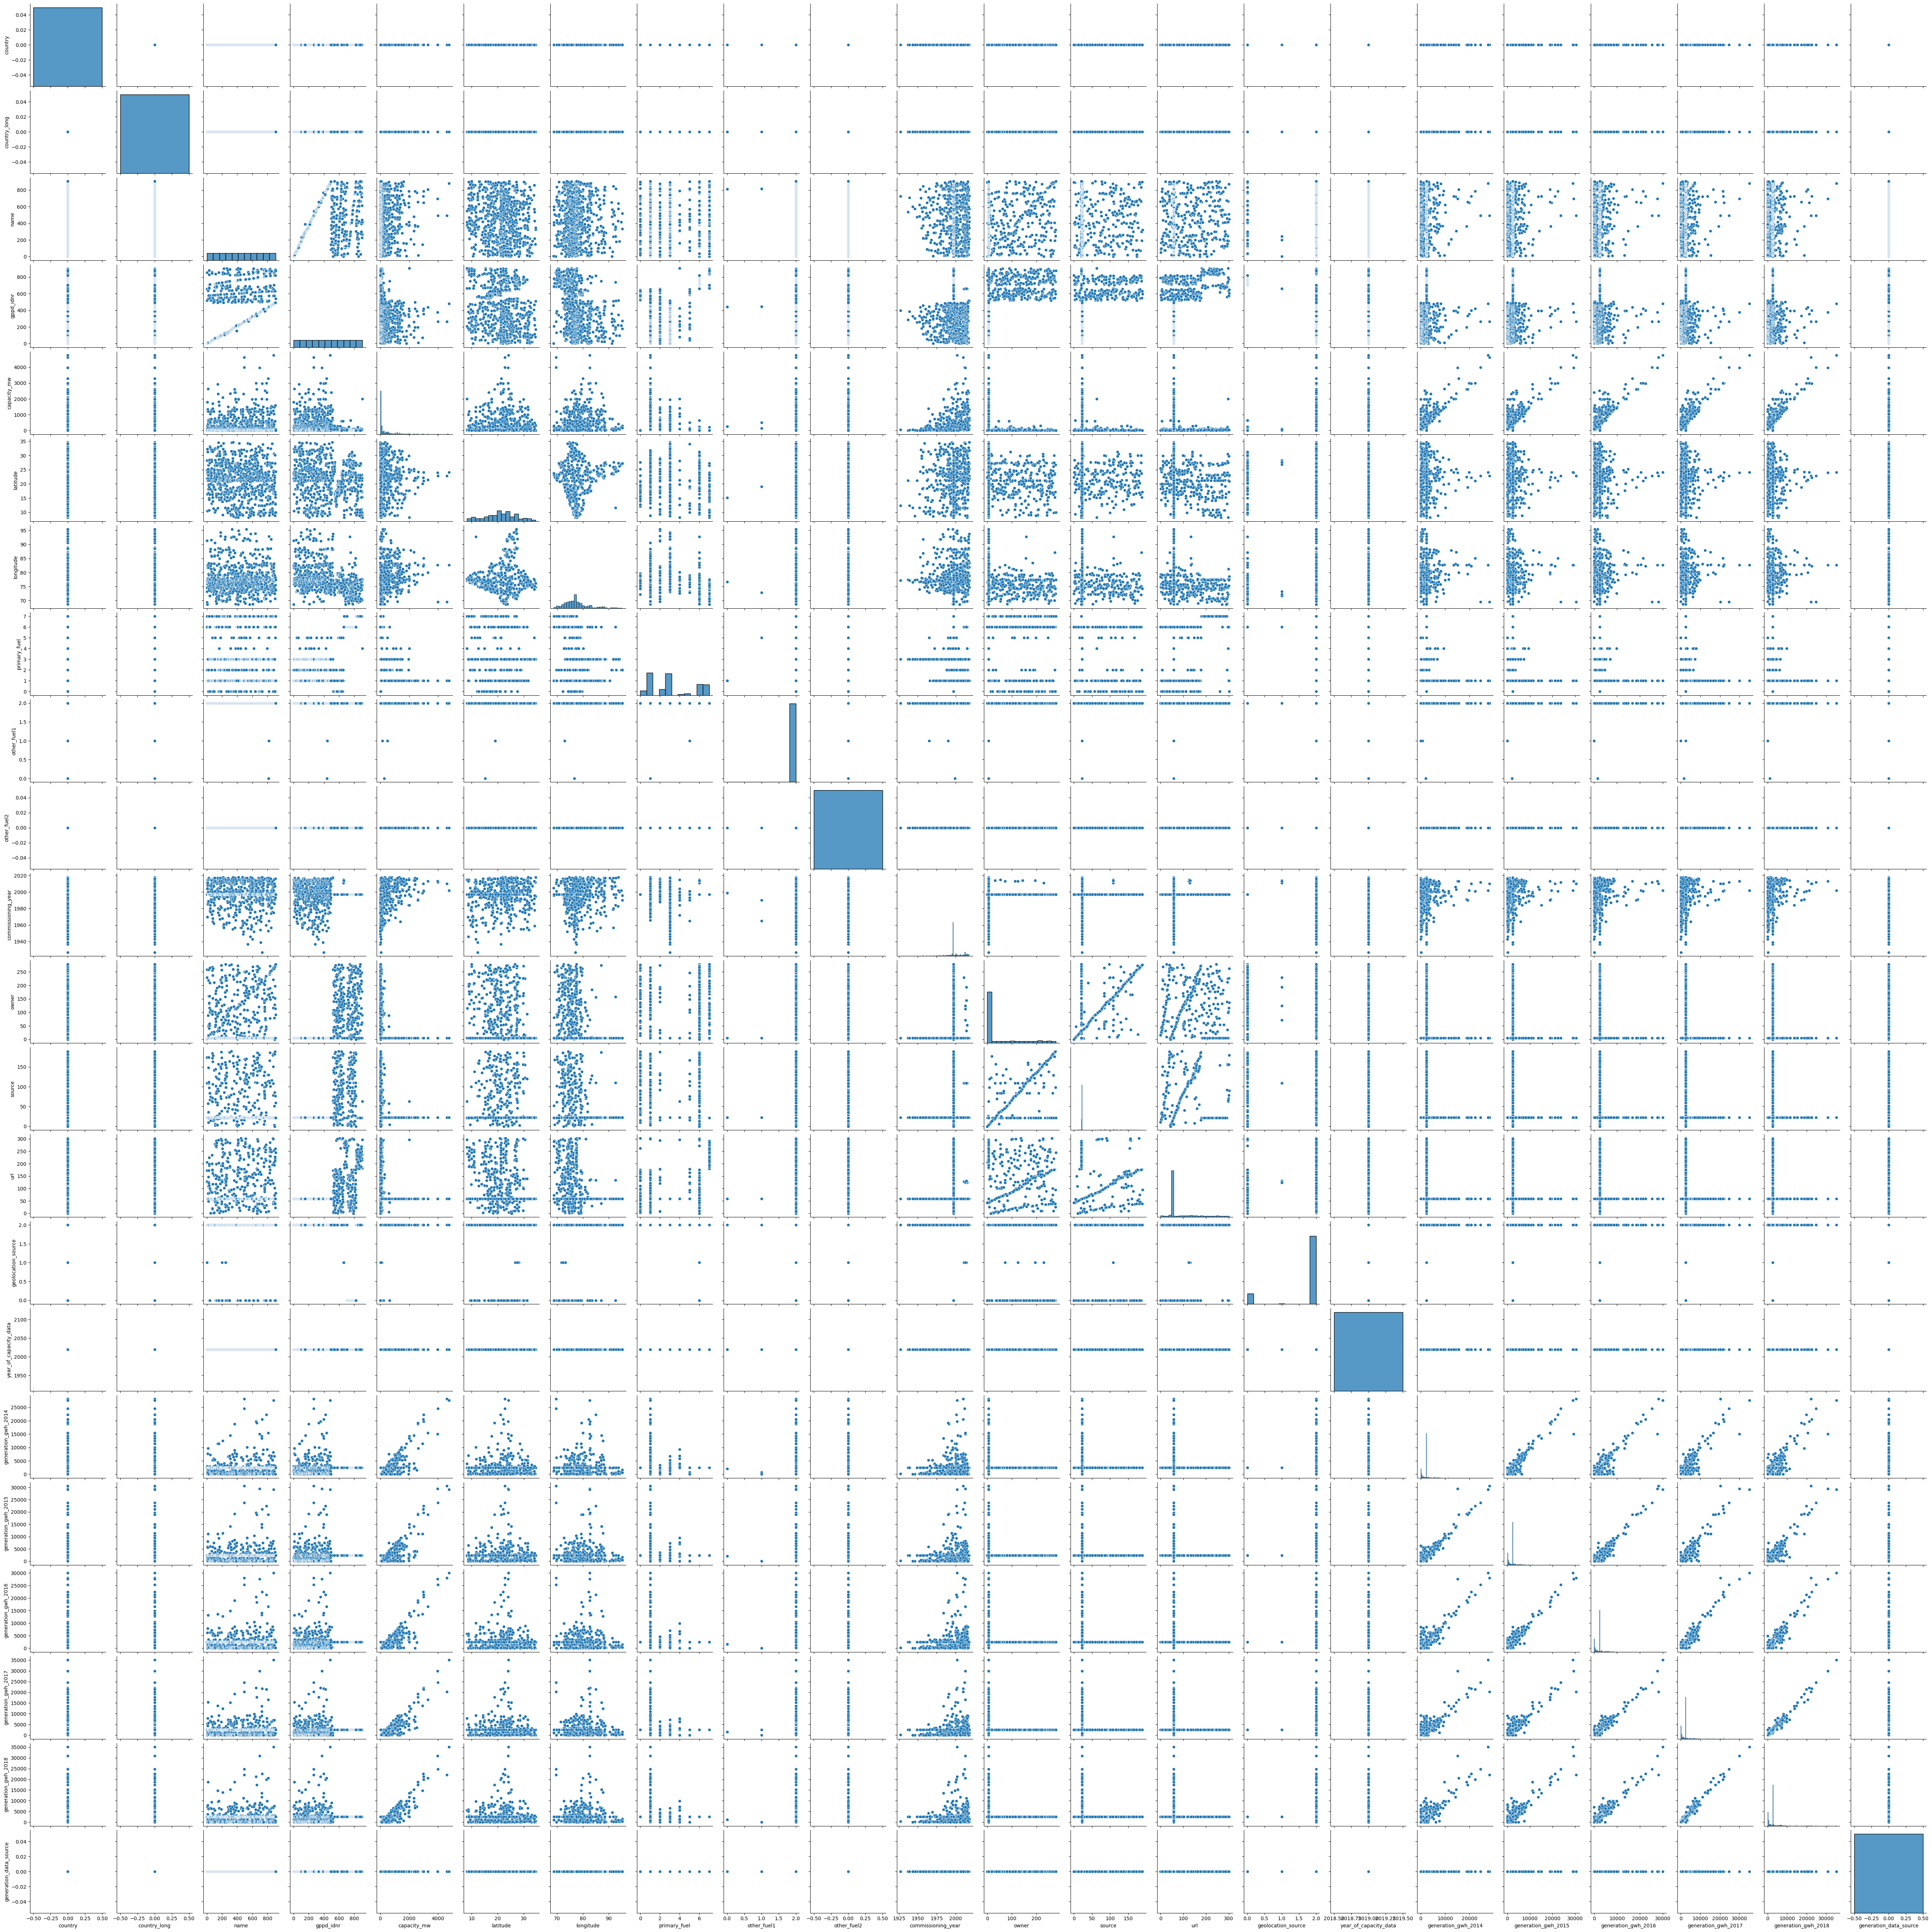

In [51]:
sns.pairplot(df_n)
plt.show()

# Correlation

In [52]:
# 1. Checking the Correlation with respect to first target variable(Primary Fuel):-

df_n.corr()['primary_fuel'].sort_values()

geolocation_source       -0.483217
capacity_mw              -0.380395
longitude                -0.347948
generation_gwh_2018      -0.136983
generation_gwh_2017      -0.132003
generation_gwh_2016      -0.131051
commissioning_year       -0.126650
generation_gwh_2015      -0.124828
generation_gwh_2014      -0.124769
latitude                 -0.010204
other_fuel1               0.004912
name                      0.040753
source                    0.053613
owner                     0.284296
url                       0.589886
gppd_idnr                 0.609180
primary_fuel              1.000000
country                        NaN
country_long                   NaN
other_fuel2                    NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

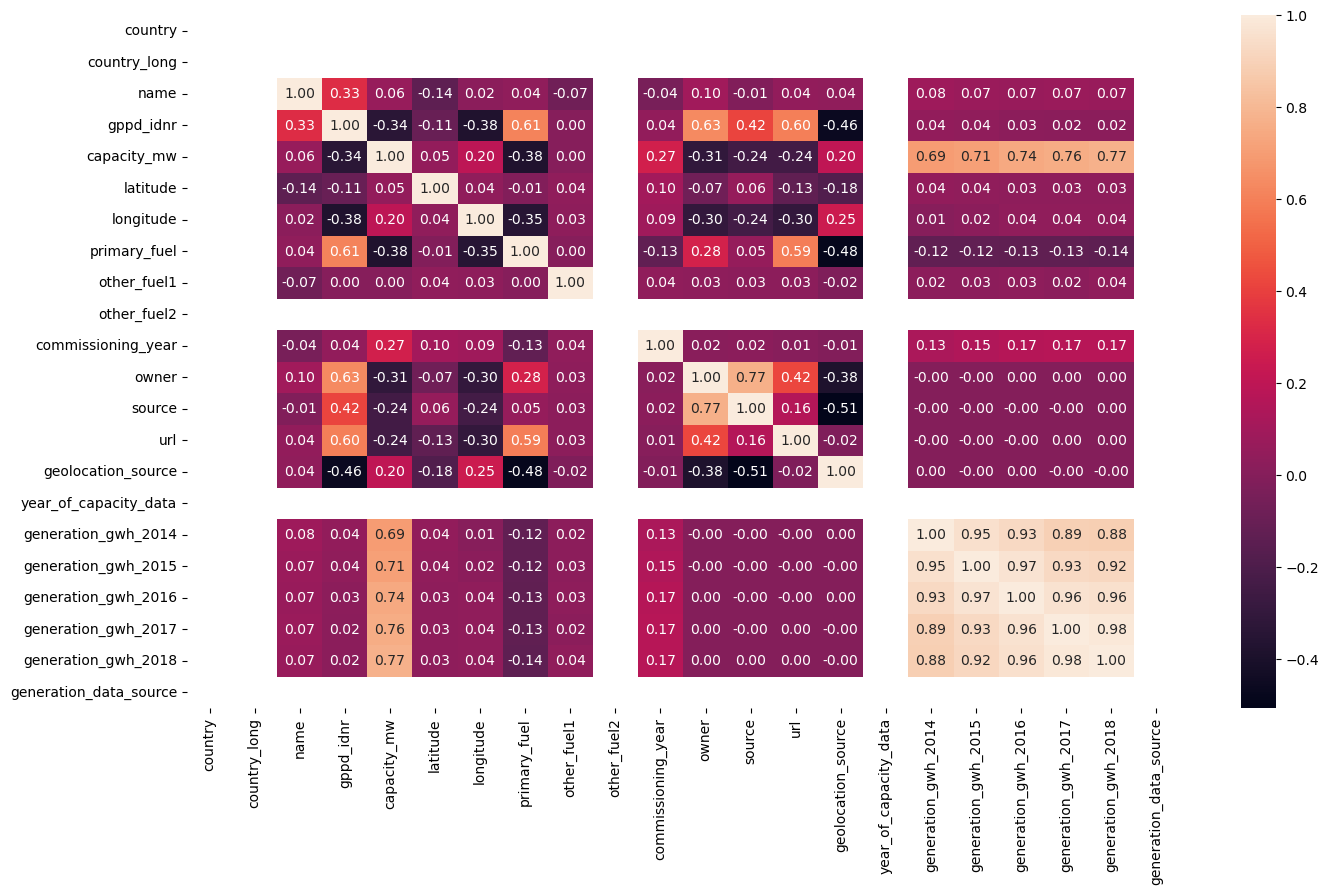

In [53]:
plt.figure(figsize=(16,9))
sns.heatmap(df_n.corr(),annot=True,fmt='0.2f')
plt.show()

Above heatmap shows that 'latitude','other_fuel1','name' and 'source' less correlated with the target variable 'primary_fuel'.


Making new dataframe in terms of primary fuel analysis:-

In [54]:
df_n1=df_n.drop(['latitude','other_fuel1','name','source','country','country_long','other_fuel2',
                   'year_of_capacity_data','generation_data_source'],axis=1)
df_n1

gppd_idnr  capacity_mw  longitude  primary_fuel  commissioning_year  \
0          657          2.5    73.2407             6         2011.000000   
1          519         98.0    74.6090             1         1997.091082   
2          853         39.2    69.3732             7         1997.091082   
3            0        135.0    91.3602             2         2004.000000   
4            1       1800.0    82.4091             1         2015.000000   
..         ...          ...        ...           ...                 ...   
902        491       1600.0    77.3568             1         2016.000000   
903        822          3.0    78.1654             6         1997.091082   
904        891         25.5    75.5811             7         1997.091082   
905        539         80.0    73.7477             1         1997.091082   
906        876         16.5    77.4768             7         1997.091082   

     owner  url  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0      229  128                   1          2431.823590          2428.226946   
1      258  173                   2          2431.823590          2428.226946   
2        2  205                   2          2431.823590          2428.226946   
3        5   58                   2           617.789264           843.747000   
4        5   58                   2          3035.550000          5916.370000   
..     ...  ...                 ...                  ...                  ...   
902      5   58                   2          2431.823590             0.994875   
903    114   22                   0          2431.823590          2428.226946   
904      5  260                   2          2431.823590          2428.226946   
905     91   82                   2          2431.823590          2428.226946   
906    279  245                   2          2431.823590          2428.226946   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            2467.936859          2547.759305          2600.804099  
1            2467.936859          2547.759305          2600.804099  
2            2467.936859          2547.759305          2600.804099  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903          2467.936859          2547.759305          2600.804099  
904          2467.936859          2547.759305          2600.804099  
905          2467.936859          2547.759305          2600.804099  
906          2467.936859          2547.759305          2600.804099  

[907 rows x 13 columns]

In [55]:
df_n1.shape

(907, 13)

In [56]:
# checking for the skewness:-

df_n.skew()

country                    0.000000
country_long               0.000000
name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.123576
latitude                  -0.149698
longitude                  1.141881
primary_fuel               0.472251
other_fuel1              -20.453120
other_fuel2                0.000000
commissioning_year        -1.399359
owner                      1.364406
source                     1.827373
url                        1.510537
geolocation_source        -2.159841
year_of_capacity_data      0.000000
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source     0.000000
dtype: float64

Above observations shows that 'capacity_mw','commissioning_year','generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017' and 'generation_gwh_2018' are higly skewed.

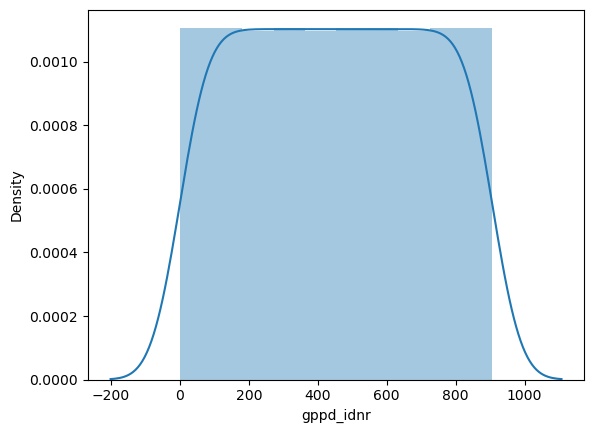

In [57]:
# checking with the distribution curve:-

sns.distplot(df_n1['gppd_idnr'])
plt.show()

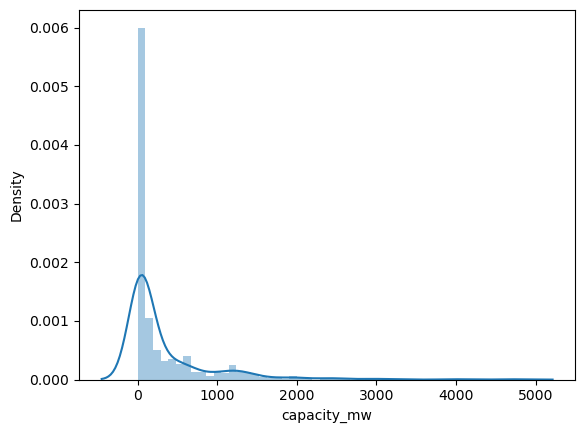

In [58]:
sns.distplot(df_n1['capacity_mw'])
plt.show()

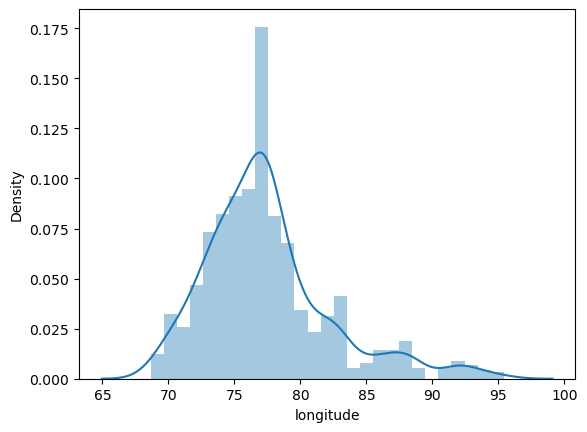

In [59]:
sns.distplot(df_n1['longitude'])
plt.show()

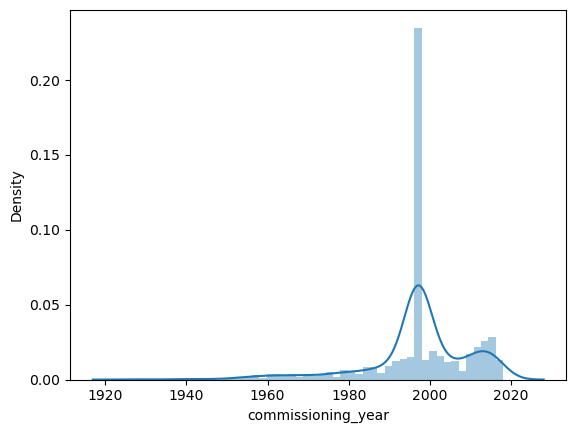

In [60]:
sns.distplot(df_n1['commissioning_year'])
plt.show()

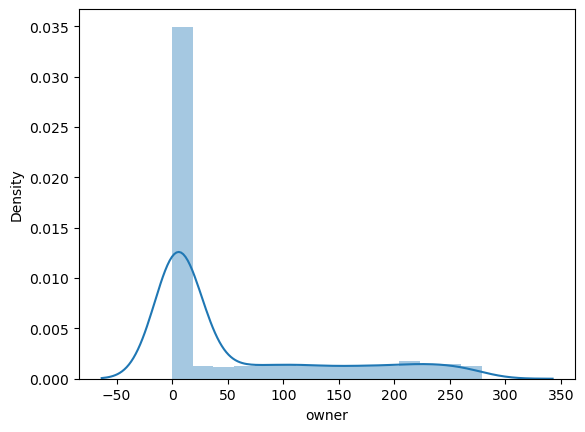

In [61]:
sns.distplot(df_n1['owner'])
plt.show()

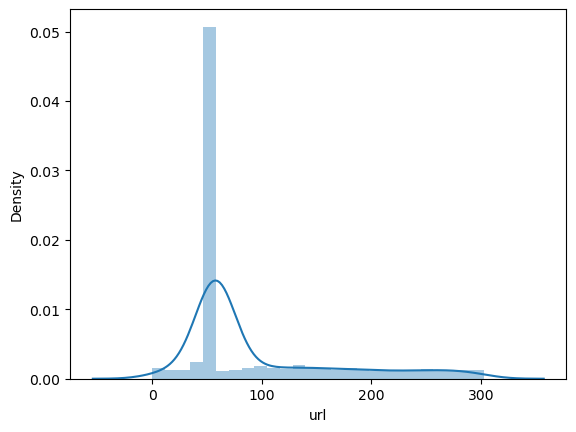

In [62]:
sns.distplot(df_n1['url'])
plt.show()

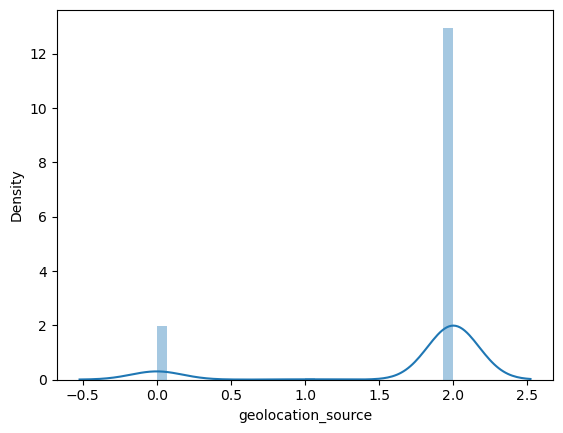

In [63]:
sns.distplot(df_n1['geolocation_source'])
plt.show()

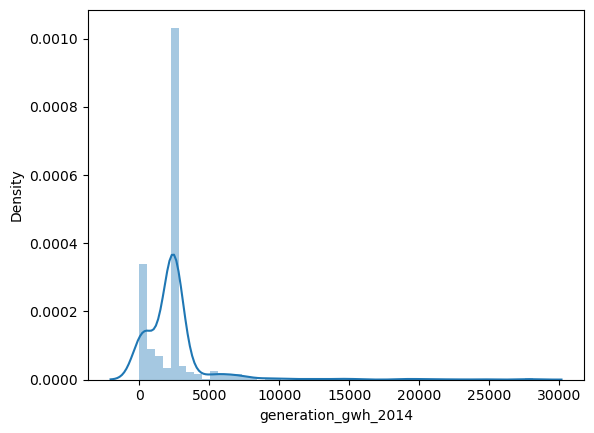

In [64]:
sns.distplot(df_n1['generation_gwh_2014'])
plt.show()

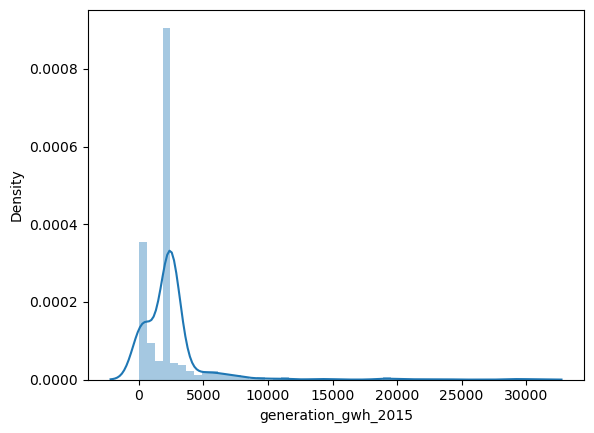

In [65]:
sns.distplot(df_n1['generation_gwh_2015'])
plt.show()

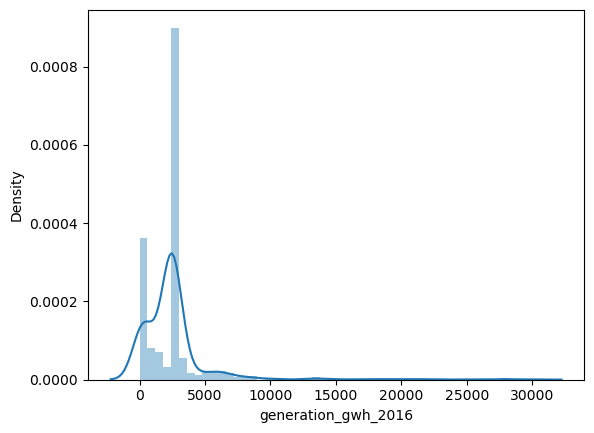

In [66]:
sns.distplot(df_n1['generation_gwh_2016'])
plt.show()

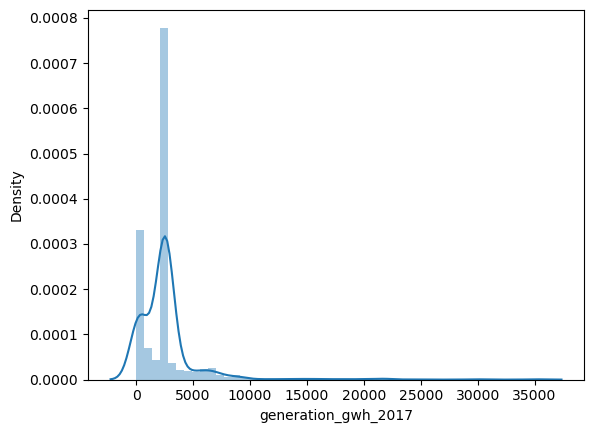

In [67]:
sns.distplot(df_n1['generation_gwh_2017'])
plt.show()

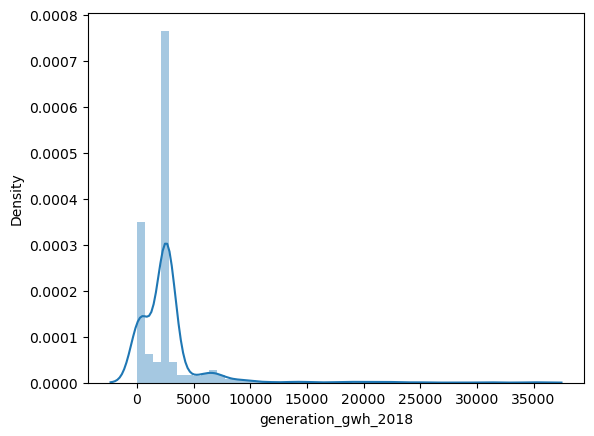

In [68]:
sns.distplot(df_n1['generation_gwh_2018'])
plt.show()

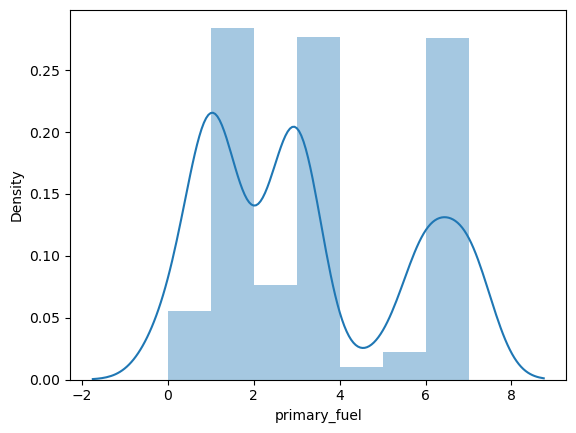

In [69]:
sns.distplot(df_n1['primary_fuel'])
plt.show()

Above visualizations shows that the is not normalized and very highly skewed. The building blocks is out of normalized curve.

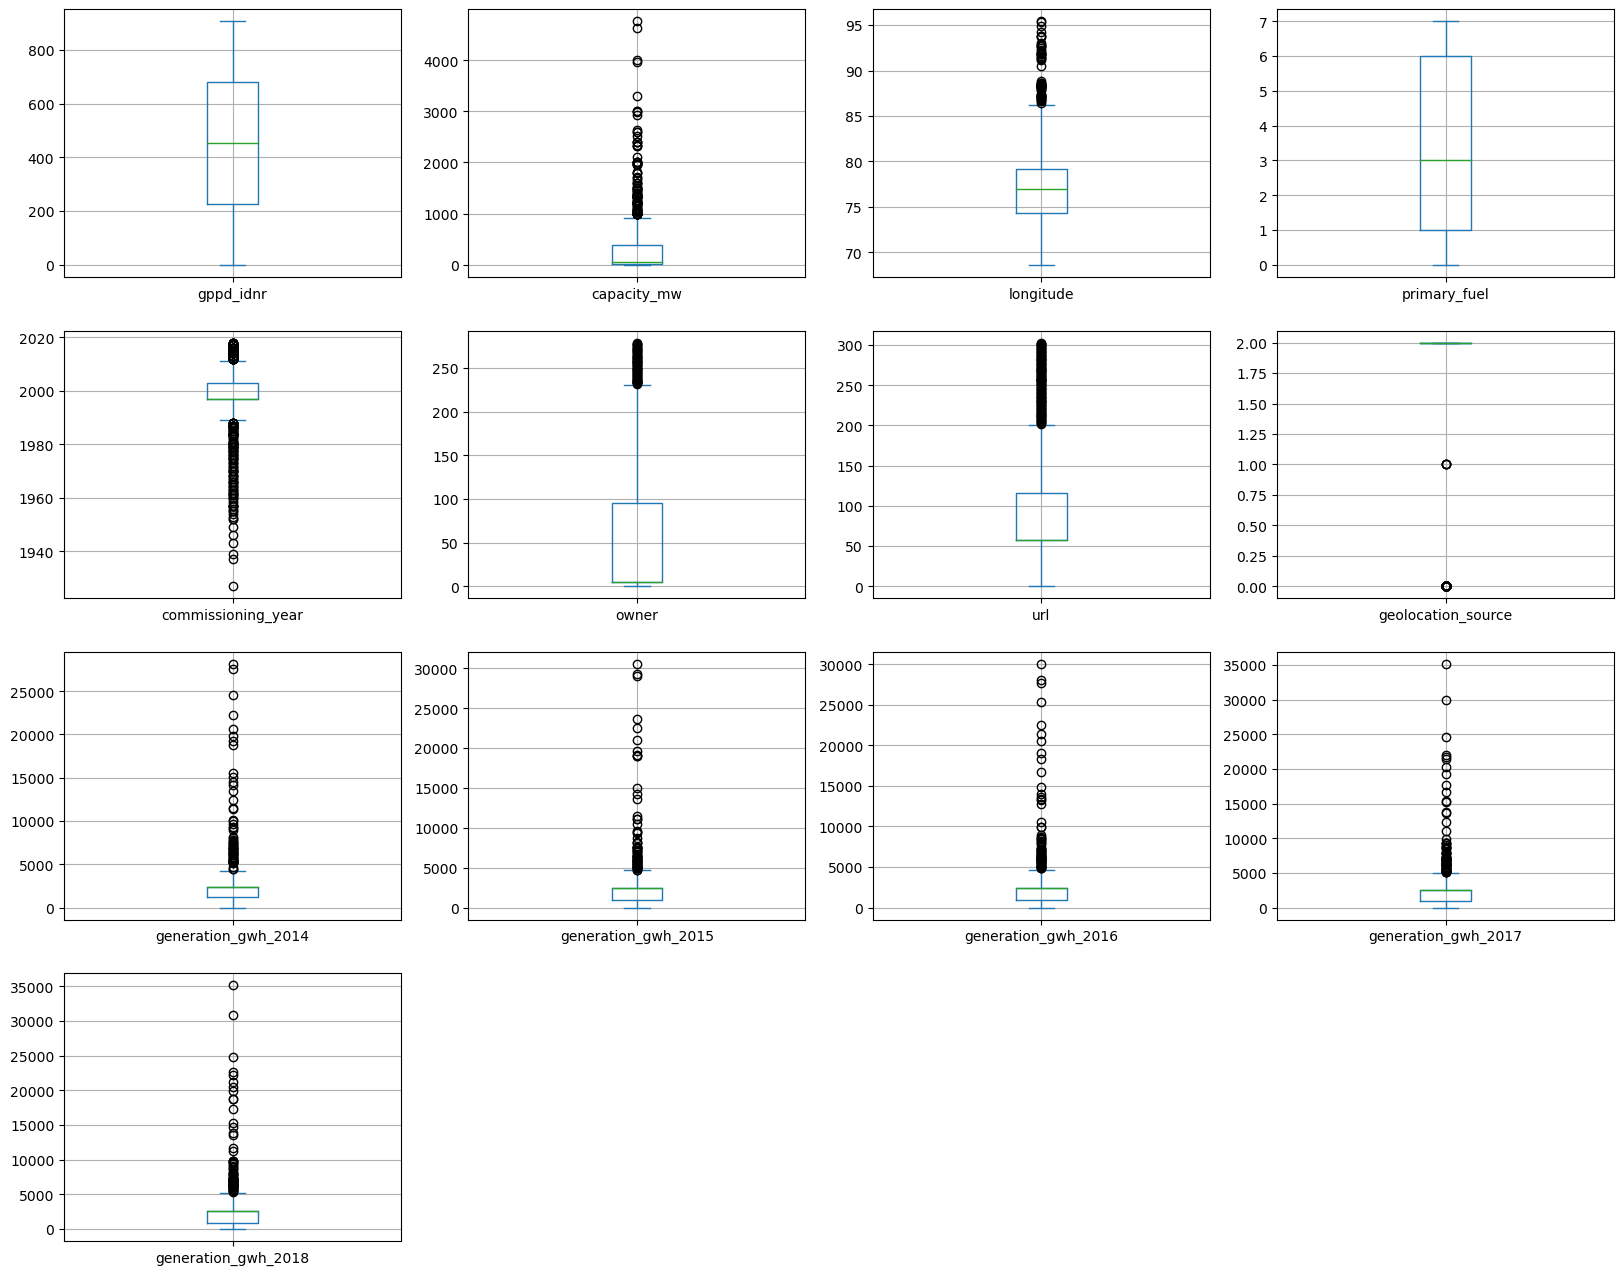

In [70]:
# Outliers Removal:-

df_n1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [71]:
from scipy.stats import zscore
z=np.abs(zscore(df_n1))
z

gppd_idnr  capacity_mw  longitude  primary_fuel  commissioning_year  \
0     0.779137     0.548908   0.878280      1.225688        1.069162e+00   
1     0.252074     0.386977   0.593788      0.967877        1.747794e-14   
2     1.527719     0.486679   1.682394      1.664401        1.747794e-14   
3     1.730142     0.324240   2.889052      0.529164        5.310801e-01   
4     1.726323     2.498942   1.027976      0.967877        1.376637e+00   
..         ...          ...        ...           ...                 ...   
902   0.145133     2.159821   0.022477      0.967877        1.453505e+00   
903   1.409321     0.548060   0.145644      1.225688        1.747794e-14   
904   1.672853     0.509909   0.391673      1.664401        1.747794e-14   
905   0.328460     0.417498   0.772866      0.967877        1.747794e-14   
906   1.615563     0.525169   0.002473      1.664401        1.747794e-14   

        owner       url  geolocation_source  generation_gwh_2014  \
0    2.095328  0.476673            1.083349         1.707094e-16   
1    2.446913  1.116401            0.394241         1.707094e-16   
2    0.656734  1.571318            0.394241         1.707094e-16   
3    0.620363  0.518459            0.394241         6.809773e-01   
4    0.620363  0.518459            0.394241         2.266352e-01   
..        ...       ...                 ...                  ...   
902  0.620363  0.518459            0.394241         1.707094e-16   
903  0.701112  1.030242            2.560940         1.707094e-16   
904  0.620363  2.353208            0.394241         1.707094e-16   
905  0.422268  0.177271            0.394241         1.707094e-16   
906  2.701509  2.139965            0.394241         1.707094e-16   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.000000             0.000000         3.114824e-16   
1               0.000000             0.000000         3.114824e-16   
2               0.000000             0.000000         3.114824e-16   
3               0.554446             0.549988         6.452243e-01   
4               1.220581             1.312471         9.718925e-01   
..                   ...                  ...                  ...   
902             0.849344             0.776810         5.761719e-01   
903             0.000000             0.000000         3.114824e-16   
904             0.000000             0.000000         3.114824e-16   
905             0.000000             0.000000         3.114824e-16   
906             0.000000             0.000000         3.114824e-16   

     generation_gwh_2018  
0           1.501244e-16  
1           1.501244e-16  
2           1.501244e-16  
3           6.518573e-01  
4           1.544399e+00  
..                   ...  
902         6.319636e-01  
903         1.501244e-16  
904         1.501244e-16  
905         1.501244e-16  
906         1.501244e-16  

[907 rows x 13 columns]

In [72]:
# index no.

np.where(z>3)

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
        179, 183, 209, 209, 209, 209, 209, 209, 222, 244, 308, 308, 308,
        308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364, 364,
        364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493,
        493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 538,
        541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 648, 648,
        648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
        695, 706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
        726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786,
        788, 807, 808, 808, 808, 808, 808, 808, 818, 847, 848, 880, 880,
        880, 880, 880, 880], dtype=int64),
 array([ 1,  9, 10, 11, 12,  1,  8,  9, 10, 11, 12,  1,  8,  2,  2,  1,  8,
         9, 10, 11, 12,  4,  2,  1,  8,  9, 10, 11, 12,  2,  2,  2,  4,  2,
         1,  1,  8,  9, 10, 11, 12,  4,  1,  2,  2,  4,  4,  4,  1,  4,  1,

In [73]:
df1_new=df_n1[(z<3).all(axis=1)]
df1_new

gppd_idnr  capacity_mw  longitude  primary_fuel  commissioning_year  \
0          657          2.5    73.2407             6         2011.000000   
1          519         98.0    74.6090             1         1997.091082   
2          853         39.2    69.3732             7         1997.091082   
3            0        135.0    91.3602             2         2004.000000   
4            1       1800.0    82.4091             1         2015.000000   
..         ...          ...        ...           ...                 ...   
902        491       1600.0    77.3568             1         2016.000000   
903        822          3.0    78.1654             6         1997.091082   
904        891         25.5    75.5811             7         1997.091082   
905        539         80.0    73.7477             1         1997.091082   
906        876         16.5    77.4768             7         1997.091082   

     owner  url  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0      229  128                   1          2431.823590          2428.226946   
1      258  173                   2          2431.823590          2428.226946   
2        2  205                   2          2431.823590          2428.226946   
3        5   58                   2           617.789264           843.747000   
4        5   58                   2          3035.550000          5916.370000   
..     ...  ...                 ...                  ...                  ...   
902      5   58                   2          2431.823590             0.994875   
903    114   22                   0          2431.823590          2428.226946   
904      5  260                   2          2431.823590          2428.226946   
905     91   82                   2          2431.823590          2428.226946   
906    279  245                   2          2431.823590          2428.226946   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            2467.936859          2547.759305          2600.804099  
1            2467.936859          2547.759305          2600.804099  
2            2467.936859          2547.759305          2600.804099  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903          2467.936859          2547.759305          2600.804099  
904          2467.936859          2547.759305          2600.804099  
905          2467.936859          2547.759305          2600.804099  
906          2467.936859          2547.759305          2600.804099  

[849 rows x 13 columns]

In [74]:
df_n1.shape

(907, 13)

In [75]:
df1_new.shape

(849, 13)

In [76]:
# percentage data loss:-

loss_percent=(907-849)/(907*100)
print(loss_percent,'%')

0.0006394707828004411 %


In [77]:
x=df_n1.drop(['primary_fuel'],axis=1)
x

gppd_idnr  capacity_mw  longitude  commissioning_year  owner  url  \
0          657          2.5    73.2407         2011.000000    229  128   
1          519         98.0    74.6090         1997.091082    258  173   
2          853         39.2    69.3732         1997.091082      2  205   
3            0        135.0    91.3602         2004.000000      5   58   
4            1       1800.0    82.4091         2015.000000      5   58   
..         ...          ...        ...                 ...    ...  ...   
902        491       1600.0    77.3568         2016.000000      5   58   
903        822          3.0    78.1654         1997.091082    114   22   
904        891         25.5    75.5811         1997.091082      5  260   
905        539         80.0    73.7477         1997.091082     91   82   
906        876         16.5    77.4768         1997.091082    279  245   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                     1          2431.823590          2428.226946   
1                     2          2431.823590          2428.226946   
2                     2          2431.823590          2428.226946   
3                     2           617.789264           843.747000   
4                     2          3035.550000          5916.370000   
..                  ...                  ...                  ...   
902                   2          2431.823590             0.994875   
903                   0          2431.823590          2428.226946   
904                   2          2431.823590          2428.226946   
905                   2          2431.823590          2428.226946   
906                   2          2431.823590          2428.226946   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            2467.936859          2547.759305          2600.804099  
1            2467.936859          2547.759305          2600.804099  
2            2467.936859          2547.759305          2600.804099  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903          2467.936859          2547.759305          2600.804099  
904          2467.936859          2547.759305          2600.804099  
905          2467.936859          2547.759305          2600.804099  
906          2467.936859          2547.759305          2600.804099  

[907 rows x 12 columns]

In [78]:
y=df_n1['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

# Machine Learning Algorithms Training and Testing of AveragePrice

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Best Random State

In [80]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

mnb=MultinomialNB()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mnb.fit(x_train,y_train)
    pred_mnb=mnb.predict(x_test)
    acc=accuracy_score(y_test,pred_mnb)
    print('accuracy',acc,'random_state',i)
    print('\n')
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.4175824175824176 random_state 0


max_accuracy 0.4175824175824176 max_random_state 0
accuracy 0.45604395604395603 random_state 1


max_accuracy 0.45604395604395603 max_random_state 1
accuracy 0.38461538461538464 random_state 2


accuracy 0.4835164835164835 random_state 3


max_accuracy 0.4835164835164835 max_random_state 3
accuracy 0.4175824175824176 random_state 4


accuracy 0.532967032967033 random_state 5


max_accuracy 0.532967032967033 max_random_state 5
accuracy 0.3901098901098901 random_state 6


accuracy 0.4065934065934066 random_state 7


accuracy 0.44505494505494503 random_state 8


accuracy 0.4725274725274725 random_state 9


accuracy 0.45054945054945056 random_state 10


accuracy 0.42857142857142855 random_state 11


accuracy 0.41208791208791207 random_state 12


accuracy 0.5 random_state 13


accuracy 0.44505494505494503 random_state 14


accuracy 0.42857142857142855 random_state 15


accuracy 0.4835164835164835 random_state 16


accuracy 0.42857142857142855 ran

In [81]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.5439560439560439 on Random_state 33


In [82]:
# Naive Bayes Classifier;

mnb=MultinomialNB()

mnb.fit(x_train,y_train)
pred_mnb=mnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_mnb)*100)
print(confusion_matrix(y_test,pred_mnb))
print(classification_report(y_test,pred_mnb))

Accuracy 49.45054945054945
[[ 8  0  0  0  0  0  0  0]
 [13 19 11  3  6  0  0  2]
 [ 0  1  8  4  0  0  0  0]
 [17  1 18 16  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 2  0  3  1  0  1  0  1]
 [ 2  0  0  0  0  0 14  5]
 [ 0  0  0  0  0  0  1 24]]
              precision    recall  f1-score   support

           0       0.19      1.00      0.32         8
           1       0.90      0.35      0.51        54
           2       0.20      0.62      0.30        13
           3       0.67      0.30      0.42        53
           4       0.00      0.00      0.00         0
           5       1.00      0.12      0.22         8
           6       0.93      0.67      0.78        21
           7       0.75      0.96      0.84        25

    accuracy                           0.49       182
   macro avg       0.58      0.50      0.42       182
weighted avg       0.74      0.49      0.52       182



In [83]:
# Support vector classifier;

from sklearn.svm import SVC
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 43.956043956043956
[[ 0  0  0  0  0  8  0]
 [ 0 28  0 10  0 16  0]
 [ 0  1  0 12  0  0  0]
 [ 0  4  0 31  0 18  0]
 [ 0  0  0  5  0  3  0]
 [ 0  0  0  0  0 21  0]
 [ 0  0  0  0  0 25  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.85      0.52      0.64        54
           2       0.00      0.00      0.00        13
           3       0.53      0.58      0.56        53
           5       0.00      0.00      0.00         8
           6       0.23      1.00      0.38        21
           7       0.00      0.00      0.00        25

    accuracy                           0.44       182
   macro avg       0.23      0.30      0.23       182
weighted avg       0.43      0.44      0.40       182



In [84]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 78.02197802197803
[[ 4  4  0  0  0  0  0  0]
 [ 1 42  7  3  0  1  0  0]
 [ 0  2  7  3  1  0  0  0]
 [ 0  6  7 40  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  2  0  1  4  0  0]
 [ 0  0  1  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.76      0.78      0.77        54
           2       0.29      0.54      0.38        13
           3       0.87      0.75      0.81        53
           4       0.00      0.00      0.00         0
           5       0.80      0.50      0.62         8
           6       1.00      0.95      0.98        21
           7       1.00      1.00      1.00        25

    accuracy                           0.78       182
   macro avg       0.69      0.63      0.65       182
weighted avg       0.82      0.78      0.80       182



In [85]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 82.96703296703298
[[ 7  1  0  0  0  0  0]
 [ 1 46  3  3  1  0  0]
 [ 0  2  5  6  0  0  0]
 [ 0  8  2 43  0  0  0]
 [ 0  1  3  0  4  0  0]
 [ 0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.79      0.85      0.82        54
           2       0.38      0.38      0.38        13
           3       0.83      0.81      0.82        53
           5       0.80      0.50      0.62         8
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        25

    accuracy                           0.83       182
   macro avg       0.81      0.77      0.79       182
weighted avg       0.83      0.83      0.83       182



In [86]:
# Cross Validation for Naive Bayes Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(mnb,x_train,y_train,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_mnb)*100)

Cross validation score of Logistic Regression model: [0.5308642  0.4691358  0.60493827 0.40740741 0.54320988 0.5625
 0.5125     0.4875     0.4       ]
Mean of Cross validation score: 0.5020061728395062
Accuracy 49.45054945054945


In [87]:
# Cross Validation for  support vector classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(svc,x_train,y_train,cv=9)
print('Cross validation score of Support Vector Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predsvc)*100)

Cross validation score of Support Vector Classifier model: [0.4691358  0.50617284 0.51851852 0.4691358  0.4691358  0.45
 0.45       0.475      0.4125    ]
Mean of Cross validation score: 0.4688443072702332
Accuracy 43.956043956043956


In [88]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_train,y_train,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.71604938 0.79012346 0.81481481 0.74074074 0.80246914 0.825
 0.8        0.85       0.7625    ]
Mean of Cross validation score: 0.7890775034293553
Accuracy 78.02197802197803


In [89]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_train,y_train,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.79012346 0.83950617 0.82716049 0.81481481 0.83950617 0.85
 0.8625     0.8625     0.7875    ]
Mean of Cross validation score: 0.8304012345679012
Accuracy 82.96703296703298


# Hyperparameter Tuning

In [90]:
RandomForestClassifier()

RandomForestClassifier()

In [91]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7],
            'criterion':['gini','entropy'],
            'n_estimators':[100,200,300,400]}

In [92]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=parameters,cv=6,
                scoring=accuracy_score)

In [93]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [94]:
rf=RandomForestClassifier(criterion='gini',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_accuracy=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
rfs=cross_val_score(rf,x,y,cv=6)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.8
Accuracy_Score 0.7527472527472527
Cross_Val_Score 80.0


In [95]:
GCV.best_estimator_

RandomForestClassifier(max_depth=4, max_features='auto')

# Saving the Model

In [96]:
import pickle
filename='Power-Plant_Primary_Fuel_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [97]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
Power_Plant_Primary_Fuel_Prediction=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Power_Plant_Primary_Fuel_Prediction

original  predicted
0           1          3
1           7          7
2           3          3
3           7          7
4           3          3
..        ...        ...
177         3          3
178         3          3
179         3          1
180         1          1
181         1          1

[182 rows x 2 columns]